<a href="https://colab.research.google.com/github/natalie-ava/GoogleADA_Capstone/blob/main/NHuang_GoogleADA_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


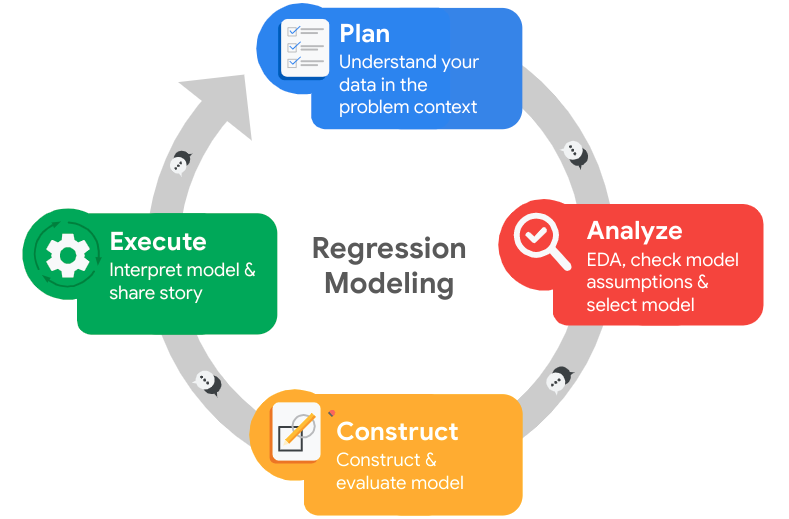

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Plan:**
The primary stakeholders for this project are the HR department and executive leadership at Salifort Motors. My goal is to identify the key factors that contribute to employee turnover and to build a predictive model that helps the company anticipate which employees are most likely to leave. Upon exploring the data, my initial observations are that lower satisfaction levels, lack of promotion, and longer tenure may be linked to higher turnover. Resources used during this stage include data exploration tools like pandas and seaborn in Python, along with external references such as Kaggle’s HR dataset for context and benchmarking. Ethical considerations include ensuring that employee data is used responsibly and safely, avoiding bias in model predictions, and maintaining employee privacy throughout the analysis process.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [ ]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
#Rename columns as needed
df0 = df0.rename(columns={'time_spend_company':'years','average_montly_hours':'avg_monthly_hrs','number_project':'project(s)','promotion_last_5years':'promoted'})

In [ ]:
# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'project(s)',
       'avg_monthly_hrs', 'years', 'Work_accident', 'left', 'promoted',
       'Department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
df0.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
project(s),0
avg_monthly_hrs,0
years,0
Work_accident,0
left,0
promoted,0
Department,0
salary,0


### Check duplicates

Check for any duplicate entries in the data.

In [ ]:
# Check for duplicates
df0.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
14994,True
14995,True
14996,True
14997,True


In [ ]:
df0.duplicated().sum()

np.int64(3008)

In [ ]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,project(s),avg_monthly_hrs,years,Work_accident,left,promoted,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,project(s),avg_monthly_hrs,years,Work_accident,left,promoted,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
#save new df as csv
df1.to_csv('Cleaned_HR_capstone_dataset.csv', index=False)

### Check outliers

Check for outliers in the data.

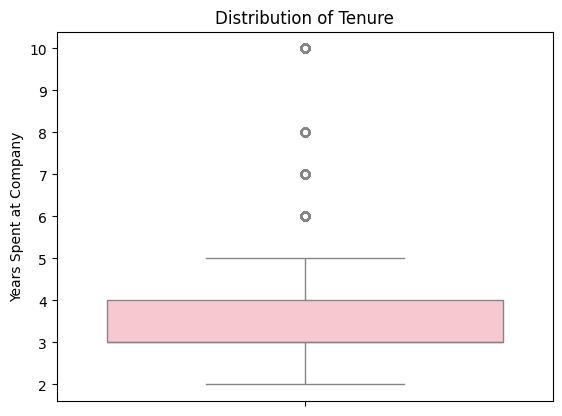

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df1['years'],color='pink')
plt.title("Distribution of Tenure")
plt.ylabel("Years Spent at Company")

#save as pdf
plt.savefig('distoftenure.pdf')
plt.show()

In [ ]:
# Determine the number of rows containing outliers
df1[(df1['years'] == 10)]

,satisfaction_level,last_evaluation,project(s),avg_monthly_hrs,years,Work_accident,left,promoted,Department,salary
11078,0.69,0.88,3,164,10,0,0,0,management,medium
11124,0.29,0.75,6,271,10,0,0,0,sales,medium
11193,0.75,0.60,4,186,10,1,0,0,marketing,low
11194,0.61,0.89,3,242,10,0,0,0,sales,high
11195,0.47,0.79,3,284,10,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


In [ ]:
# Calculate IQR bounds
Q1 = df1['years'].quantile(0.25)
Q3 = df1['years'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# new dataFrame containing only the outliers
outliersdf = df1[(df1['years'] < lower_bound) | (df1['years'] > upper_bound)]

#number of outliers
print(f"Number of outlier rows: {outliersdf.shape[0]}")

Number of outlier rows: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Analyze:** During exploratory data analysis (EDA), I observed that lower satisfaction levels and higher monthly work hours are often linked to employees leaving the company, especially among those in the low and medium salary ranges. The distributions revealed a high concentration of employees with moderate satisfaction and workload, but also a noticeable cluster experiencing low satisfaction despite working extensive hours, which suggests possible burnout. I performed transformations such as renaming columns for clarity and creating grouped heatmaps and jointplots to better visualize complex relationships.

EDA is essential before building a predictive model because it uncovers hidden patterns, identifies potential outliers, and informs feature selection. Ethical considerations include maintaining employee data privacy, avoiding bias in interpretations, and ensuring any predictive insights are used to support and not penalize at-risk employees.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [ ]:
# Get numbers of people who left vs. stayed
df1['left'].value_counts()

,count
left,
0,10000
1,1991


In [ ]:
# Get percentages of people who left vs. stayed
leftvstayed = df1['left'].value_counts(normalize=True)
left_percentage = leftvstayed[1]  # Percentage of people who left (value 1)
stayed_percentage = leftvstayed[0]

print(f"Percentage who left: {left_percentage * 100:.0f}%")
print(f"Percentage who stayed: {stayed_percentage * 100:.0f}%")

Percentage who left: 17%
Percentage who stayed: 83%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

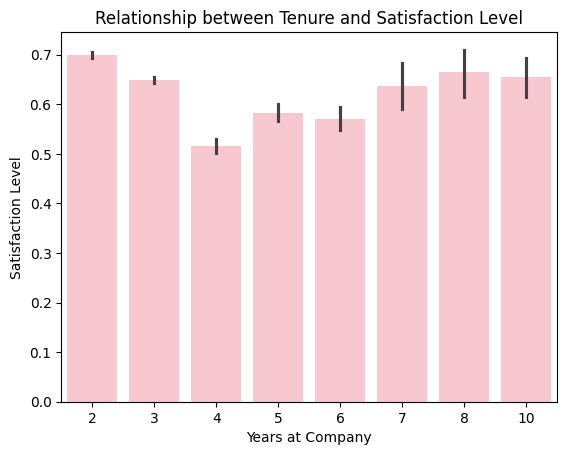

In [ ]:
#Relationship between Tenure and Satisfaction Level
sns.barplot(x='years', y='satisfaction_level', data=df1,color='pink')
plt.title("Relationship between Tenure and Satisfaction Level")
plt.xlabel("Years at Company")
plt.ylabel("Satisfaction Level")

#save as pdf
plt.savefig('tenuresatisfaction.pdf')
plt.show()

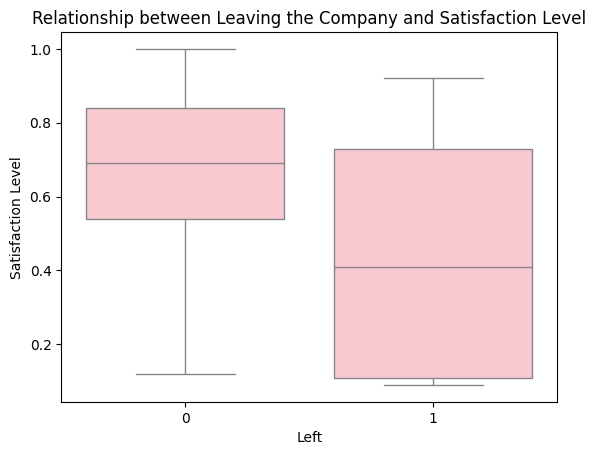

In [ ]:
# satisfaction and leaving the company
sns.boxplot(x='left', y='satisfaction_level', data=df1,color='pink')
plt.title("Relationship between Leaving the Company and Satisfaction Level")
plt.xlabel("Left")
plt.ylabel("Satisfaction Level")

#save as pdf
plt.savefig('satisfactionleaving.pdf')
plt.show()

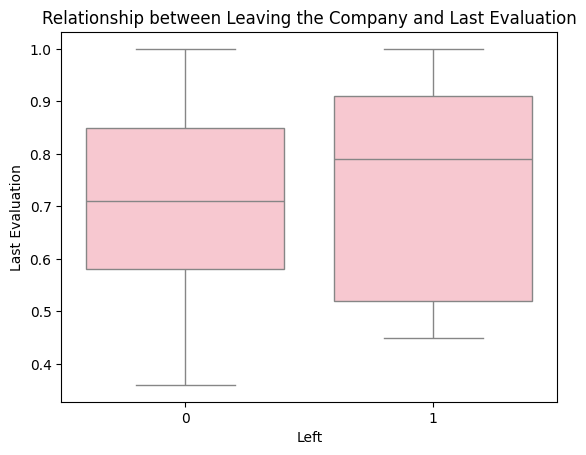

In [ ]:
# leaving and last evaluation score
sns.boxplot(x='left', y='last_evaluation', data=df1,color='pink')
plt.title("Relationship between Leaving the Company and Last Evaluation")
plt.xlabel("Left")
plt.ylabel("Last Evaluation")

#save as pdf
plt.savefig('evaluationleaving.pdf')
plt.show()

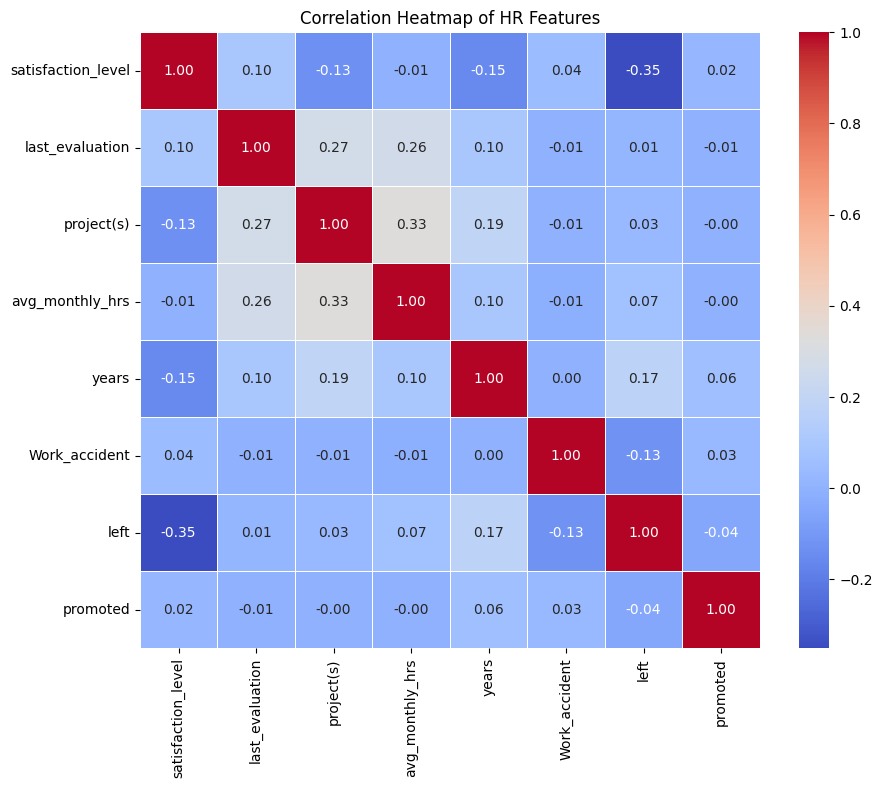

In [ ]:
#heatmap of HR features
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of HR Features')

#save as pdf
plt.savefig('heatmap.pdf')
plt.show()

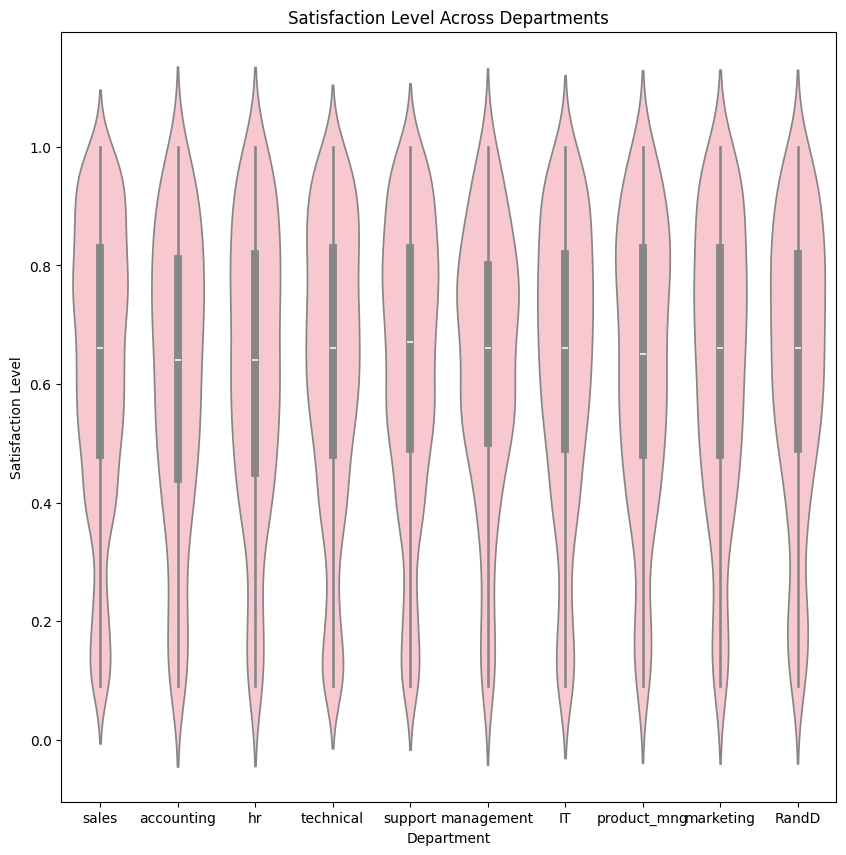

In [ ]:
#satisfaction across departments
plt.figure(figsize=(10,10))
sns.violinplot(x='Department', y='satisfaction_level', data=df1,color='pink')
plt.title("Satisfaction Level Across Departments")
plt.xlabel("Department")
plt.ylabel("Satisfaction Level")

#save as pdf
plt.savefig('satisfaction_department.pdf')
plt.show()

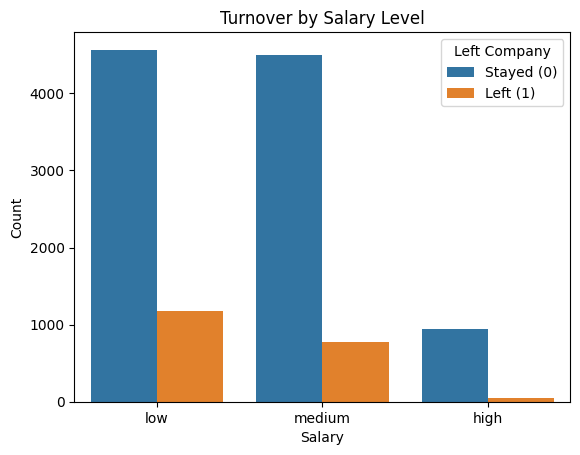

In [ ]:
#How many people at each salary level stayed or left?
sns.countplot(x='salary', hue='left', data=df1)
plt.title('Turnover by Salary Level')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.legend(title='Left Company',labels=['Stayed (0)', 'Left (1)'])

#save as pdf
plt.savefig('salary_turnover.pdf')
plt.show()

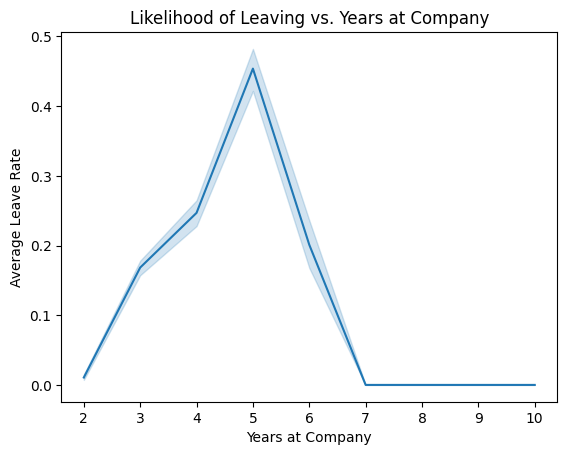

In [ ]:
#likelihood of leaving vs. years at company
sns.lineplot(x='years', y='left', data=df1, estimator='mean')
plt.title('Likelihood of Leaving vs. Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Average Leave Rate')

#save as pdf
plt.savefig('years_turnover.pdf')
plt.show()

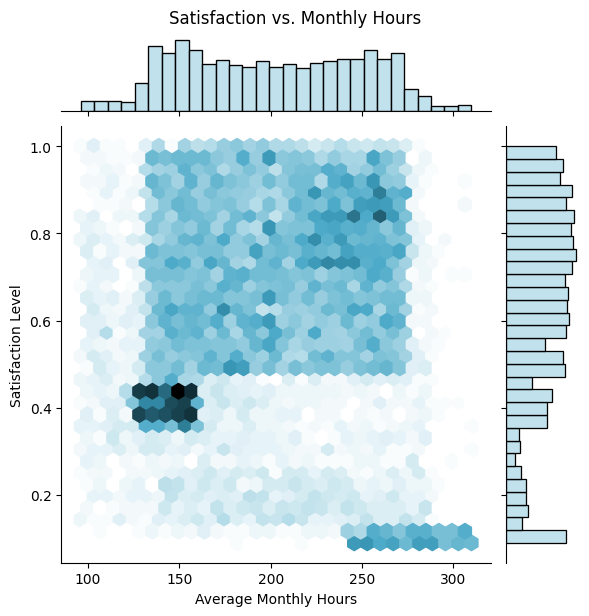

In [ ]:
#satisfaction vs. avg monthly hours
sns.jointplot(data=df1, x='avg_monthly_hrs', y='satisfaction_level', kind='hex', color='lightblue')
plt.suptitle('Satisfaction vs. Monthly Hours', y=1.02)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')

#save as pdf
plt.savefig('satisfaction_monthly.pdf')
plt.show()

### Insights

From the visualizations, several key insights emerge about employee behavior and turnover at the company:
- Job satisfaction is a major indicator of whether an employee chooses to leave the company. Violin and joint plots revealed that employees with low satisfaction levels, especially those working high monthly hours, are more likely to leave.
- Salary and turnover are closely linked. Count plots show that employees in the low and medium salary ranges account for the vast majority of departures, which suggests that compensation may be an important retention issue.
- Departmental patterns show variation in satisfaction and turnover. Heatmaps revealed that some departments with lower average satisfaction also experience higher turnover, indicating that specific teams may need targeted intervention.
- Tenure effects are visible: employees with longer time at the company (>5 years) show a lesser likelihood of leaving, while the average worker who left left at around 5 years.

Together, these plots help pinpoint where HR should focus retention efforts—such as adjusting workload, increasing engagement, and revisiting salary and promotion policies.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



One thing that stood out was how few employees had extreme values in satisfaction or work hours, which means most people fall into a fairly typical range. For the logistic regression model, I chose independent variables like satisfaction level, evaluation score, number of projects, monthly work hours, time at the company, and salary level. These were selected because earlier analysis showed they relate to whether an employee leaves.

Most assumptions of logistic regression are reasonably met, although some variables may have weaker linear relationships. The model fits the data fairly well with only 824 outliers out of 15,000. This gives us a useful prediction of who might leave. However, there’s room to improve the data by testing interaction effects or simplifying categories. Resources I used include Scikit-learn documentation, Pandas, and Seaborn.

A key ethical concern is making sure the model does not unfairly target or mislabel employees and that any predictions are used to help rather than punish those at risk of leaving.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

I fit a logistic regression model to predict whether an employee leaves the company using multiple independent variables, including satisfaction level, average monthly hours, and number of projects.

The main assumptions of logistic regression were checked. The outcome is binary, the observations are independent, and multicollinearity was minimized by reviewing correlation values. Although not all relationships with the log-odds are perfectly linear, the model is still reasonably appropriate for classification.

### Identify the type of prediction task.

This is a binary classification task since the goal is to predict one of two outcomes: whether an employee will stay or leave.

### Identify the types of models most appropriate for this task.

The most appropriate models for this binary classification problem include logistic regression, decision trees, and random forest classifiers. These models handle categorical and numerical data well and are useful for predicting binary outcomes.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
#import packages for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# dataframe copy to work with
df_model = df1.copy()

# Keep only selected features + target
selected_features = ['satisfaction_level', 'last_evaluation', 'avg_monthly_hrs', 'years', 'salary']
df_model = df1[selected_features + ['left']].copy()

# One-hot encode 'salary' since it is categorical
df_model = pd.get_dummies(df_model, columns=['salary'], drop_first=True)

# Define target and features
y = df_model['left']
X = df_model.drop('left', axis=1)

In [ ]:
# Splitting the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing and training the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[1933   65]
 [ 310   91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1998
           1       0.58      0.23      0.33       401

    accuracy                           0.84      2399
   macro avg       0.72      0.60      0.62      2399
weighted avg       0.82      0.84      0.81      2399


Accuracy Score: 0.8436848686952897


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



The logistic regression model reached an overall accuracy of 84%, meaning it correctly predicted most employee outcomes. It performed very well in identifying employees who stayed, with a 97% recall, but it struggled to correctly identify those who left, achieving only 23% recall in that group. This means the model often misses employees at risk of quitting, which is a concern since recall for class 1 (those who leave) is critical in a retention-focused model. A key insight from the model is that low satisfaction levels and longer work hours are strong indicators of turnover.

Based on these findings, I recommend that HR focus on improving job satisfaction, tracking workload trends, and identifying potential burnout cases early. To improve the model, we could add more relevant data like promotion history, performance feedback, or manager relationships, which might help the model better recognize early signs of disengagement. Other useful questions for the team to explore include which departments have the highest attrition risk, how salary levels impact turnover within teams, and how promotion timing influences retention.

Throughout this stage, I used Scikit-learn, Pandas, and Seaborn for modeling and visualization. An important ethical consideration is ensuring the model supports employees by flagging risk for proactive outreach, rather than being used in ways that could penalize or unfairly profile staff.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The logistic regression model performed well overall, achieving an accuracy of 84%. It showed strong performance in predicting employees who stayed, but had lower recall (23%) and precision (58%) for those who left, resulting in a modest F1-score of 0.33 for that group. While the model is helpful for identifying likely retainers, it struggles to detect at-risk employees. The AUC value and ROC curve further confirm that the model’s ability to rank positive cases can be improved. These results suggest that adding more predictive features or exploring alternative models could help better identify employees likely to leave.

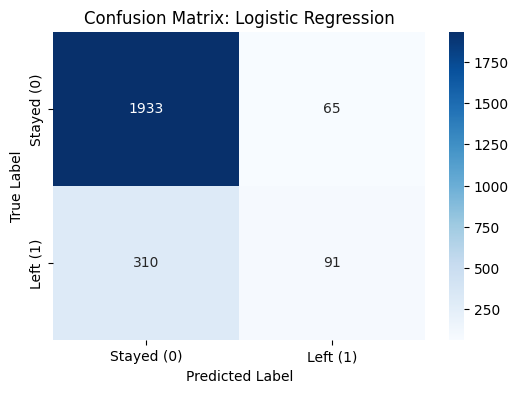

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot labeled heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed (0)', 'Left (1)'],
            yticklabels=['Stayed (0)', 'Left (1)'],cbar='False')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#save as pdf
plt.savefig('confusionmatrix.pdf')
plt.show()

### Conclusion, Recommendations, Next Steps

**Conclusion**:
The logistic regression model demonstrated strong overall accuracy in predicting employee outcomes, particularly for those who stayed with the company. However, it underperformed in identifying employees who were likely to leave, with low recall and a modest F1-score. These results highlight both the strengths and limitations of the current feature set and modeling approach.

**Recommendations:**
- Focus on improving employee satisfaction and monitoring workload, as these were the most predictive factors related to turnover.
- Regularly review employee metrics to catch signs of disengagement early, especially for high-risk roles or tenure groups.
- Use model results as a support tool, not a decision-maker, to ensure fair and ethical use of predictions in HR practices.

**Next Steps:**
- Enhance the model by incorporating additional features such as promotion history, manager feedback, or department-specific trends.
- Test alternative classification models like Random Forest or XGBoost to compare performance, especially recall.
- Consider using cross-validation and resampling techniques to address class imbalance and improve generalization.